In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('ratings.csv')

In [5]:
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [6]:
df.tail()

,userId,movieId,rating,timestamp
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944
20000262,138493,71619,2.5,1255811136


In [7]:
df.userId = pd.Categorical(df.userId)
df['new_user_id'] = df.userId.cat.codes

In [8]:
df.movieId = pd.Categorical(df.movieId)
df['new_movie_id'] = df.movieId.cat.codes

In [10]:
# converting to arrays
user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values

In [12]:
#get number of movies and users
N =len(set(user_ids))
M =len(set(movie_ids))

# embedding dimension
K =10

In [14]:
u = Input(shape=(1,))
m = Input(shape=(1,))  # Think in terms of NLP, seq len = T

# same as T =1
# Convert u and m to feature vectors
u_emb = Embedding(N,K)(u) # output is (num_samples, 1, K)
m_emb = Embedding(M,K)(m) # (num_samples, 1, K)

# flatten both embeddings
u_emb = Flatten()(u_emb)
m_emb = Flatten()(m_emb)
# Make it a single feature vector
x = Concatenate()([u_emb, m_emb])

# ANN
x = Dense(1024, activation='relu')(x)
x = Dense(1)(x)



In [32]:
model = Model(inputs=[u, m], outputs=x)
model.compile(
    loss = 'mse',
    optimizer =SGD(learning_rate = 0.08, momentum =0.9),
    metrics =['accuracy'],
)

In [33]:
user_ids, movie_ids, ratings = shuffle(user_ids, movie_ids, ratings)
Ntrain = int(0.8*len(ratings))
train_user = user_ids[:Ntrain]
train_movie = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]

test_user = user_ids[Ntrain:]
test_movie = movie_ids[Ntrain:]
test_ratings = ratings[Ntrain:]

# center the ratings
avg_rating =train_ratings.mean()
train_ratings = train_ratings - avg_rating
test_ratings = test_ratings - avg_rating

In [34]:
r = model.fit(
    x = [train_user, train_movie],
    y = train_ratings,
    epochs =25,
    batch_size =1024,
    verbose =2,
    validation_data = ([test_user, test_movie], test_ratings),
)

Epoch 1/25
15626/15626 - 91s - 6ms/step - accuracy: 0.0000e+00 - loss: 0.5486 - val_accuracy: 0.0000e+00 - val_loss: 0.5553
Epoch 2/25
15626/15626 - 98s - 6ms/step - accuracy: 0.0000e+00 - loss: 0.5416 - val_accuracy: 0.0000e+00 - val_loss: 0.5643
Epoch 3/25
15626/15626 - 86s - 6ms/step - accuracy: 0.0000e+00 - loss: 0.5377 - val_accuracy: 0.0000e+00 - val_loss: 0.5737
Epoch 4/25
15626/15626 - 91s - 6ms/step - accuracy: 0.0000e+00 - loss: 0.5350 - val_accuracy: 0.0000e+00 - val_loss: 0.5780
Epoch 5/25
15626/15626 - 95s - 6ms/step - accuracy: 0.0000e+00 - loss: 0.5328 - val_accuracy: 0.0000e+00 - val_loss: 0.5842
Epoch 6/25
15626/15626 - 76s - 5ms/step - accuracy: 0.0000e+00 - loss: 0.5310 - val_accuracy: 0.0000e+00 - val_loss: 0.5851
Epoch 7/25
15626/15626 - 50s - 3ms/step - accuracy: 0.0000e+00 - loss: 0.5294 - val_accuracy: 0.0000e+00 - val_loss: 0.5883
Epoch 8/25


KeyboardInterrupt: 

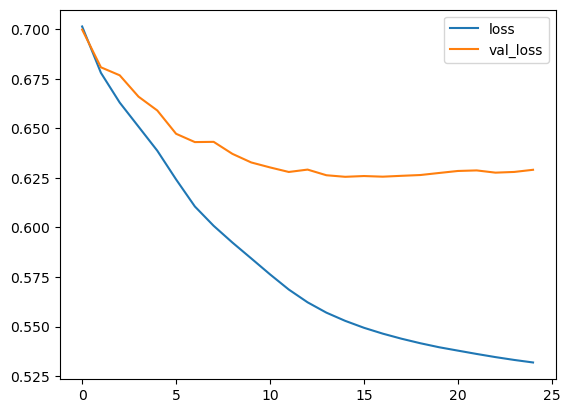

In [35]:
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [36]:
plt.plot(r.history['accuracy'], label ='acc')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

KeyError: 'accuracy'